## Ridge Regression

In [2]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline

In [3]:
df=load_boston()
df

d:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
## Covert data to dataframe
data=pd.DataFrame(df['data'])
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
## set olumn names to feature names
data.columns=df['feature_names']
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
## Independent and dependent features
X=data
Y=df['target']

In [7]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [8]:
## Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

In [9]:
## Ridge
from sklearn.linear_model import Ridge
ridge_regressor=Ridge()

In [10]:
## Import gridsearchCV for hyperparameter tuning of alpha value
from sklearn.model_selection import GridSearchCV

In [11]:
## Declare the paramters as key value pairs to try multiple values for specific parameter
parameters={'alpha':[2,2,5,10,20,30,40,50,60,80,90]}

## Create object of GridSearchCV with parameters mentioned above 
ridgeCV=GridSearchCV(ridge_regressor,param_grid=parameters,scoring='neg_mean_squared_error',cv=5)

## Fit the GridSearchCV object which will try all paramters values and will bring the best parameter with min error
ridgeCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [2, 2, 5, 10, 20, 30, 40, 50, 60, 80, 90]},
             scoring='neg_mean_squared_error')

In [12]:
## Printing the values choosen by GridSearchCV
print("Best Estimator:",ridgeCV.best_estimator_)
print("Best Parameter:",ridgeCV.best_params_)
print("Least Error:",ridgeCV.best_score_)
print("Best Index:",ridgeCV.best_index_)

Best Estimator: Ridge(alpha=2)
Best Parameter: {'alpha': 2}
Least Error: -26.356371544172077
Best Index: 0


In [13]:
## Prediction
Y_pred=ridgeCV.predict(X_test)

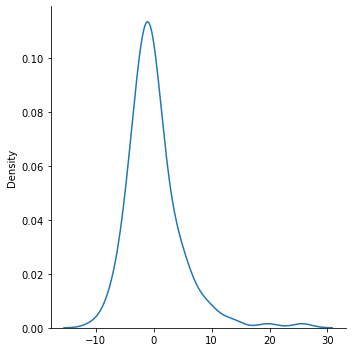

In [14]:
## Visualization
import seaborn as sns
sns.displot(Y_test-Y_pred,kind='kde')

Error lies between -10 to 10 i.e. variance is very less thus we can say model is performing well

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)

Mean Absolute Error: 3.1968877193452774
Mean Squared Error: 22.299413357015293
Root Mean Squared Error: 4.722225466558675


In [16]:
## R2 score
score=r2_score(Y_test,Y_pred)
print("R2 Score=",score)

R2 Score= 0.7007316205685639


We were getting 63% accuracy for same dataset using linear regression, Now by using Ridge we are getting 70% accuracy so we can conclude Ridge is performing better than linear regression

## Lasso Regression

In [17]:
## Lasso
from sklearn.linear_model import Lasso
lasso_regressor=Lasso()

In [18]:
## Declare the paramters as key value pairs to try multiple values for specific parameter
parameters={'alpha':[2,2,5,10,20,30,40,50,60,80,90]}

## Create object of GridSearchCV with parameters mentioned above 
lassoCV=GridSearchCV(lasso_regressor,param_grid=parameters,cv=5,scoring='neg_mean_squared_error')

## Fit the GridSearchCV object which will try all paramters values and will bring the best parameter with min error
lassoCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [2, 2, 5, 10, 20, 30, 40, 50, 60, 80, 90]},
             scoring='neg_mean_squared_error')

In [19]:
## Printing the values choosen by GridSearchCV
print("Best Estimator:",lassoCV.best_estimator_)
print("Best Parameter:",lassoCV.best_params_)
print("Least Error:",lassoCV.best_score_)
print("Best Index:",lassoCV.best_index_)

Best Estimator: Lasso(alpha=2)
Best Parameter: {'alpha': 2}
Least Error: -34.783706752388056
Best Index: 0


In [20]:
## Prediction
Y_pred=lassoCV.predict(X_test)

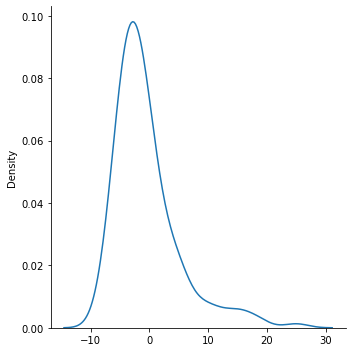

In [21]:
sns.displot(Y_test-Y_pred,kind='kde')

Variance is between -10 to 10 so model is performng well

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)

Mean Absolute Error: 4.113823546159137
Mean Squared Error: 31.16166408312277
Root Mean Squared Error: 5.582263347704296


In [23]:
## R2 score
score=r2_score(Y_test,Y_pred)
print("R2 Score=",score)

R2 Score= 0.5817961413944948
